In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.linear_model import LogisticRegression

np.random.seed(1)


In [2]:
# load data. Put the given datasets on the same directory as this python file. 
X_train=np.array(pd.read_csv('X_train.csv', header=None))
y_train=np.array(pd.read_csv('y_train.csv', header=None))
X_test=np.array(pd.read_csv('X_test.csv', header=None))


 # Data exploration

In [3]:
# TODO: Your code for data exploration should be inserted here. Create more cells as you see fit. 
# Suggestions: what is the size of the datasets? Which feature has the largest standard deviation? Do there exist missing values?

#Finding the size of datasets
print('Data Size of each datasets')
print('X_train has {} rows and {} columns'.format(*X_train.shape)) #Print X_train shape
print('y_train has {} rows and {} columns'.format(*y_train.shape)) #Print y_train shape

Data Size of each datasets
X_train has 4000 rows and 20 columns
y_train has 4000 rows and 1 columns


In [4]:
#Find 5 rows from the X data set
pd.DataFrame(X_train).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-0.540427,-0.155325,2.631465,1.389193,-0.063218,1.561461,1.382513,1.883798,1.724010,-1.559558,-0.657512,1.378163,0.340825,0.473474,0.174819,-0.801729,-0.941176,0.514037,2.720586,-2.150298
1,0.862001,1.511557,0.498194,-0.595903,-1.309024,0.190568,-0.228355,0.408208,0.312975,0.703785,2.246725,-0.625960,-3.389832,0.466486,1.305762,-0.778975,-2.126956,-0.375437,-1.248179,0.471829
2,-1.875814,1.421319,-0.571312,-0.717532,0.266088,-0.198699,-2.014234,-4.058332,1.462257,0.224203,-0.571824,-1.988518,0.872759,-0.722073,-0.491594,-0.511760,1.096380,-0.472839,1.097072,1.017523
3,-3.130254,-0.647899,0.369800,-0.946639,1.976566,-0.499470,-1.384192,-2.101830,1.028029,-0.278442,0.020023,-0.153323,-0.977029,0.487107,1.215521,0.831794,0.044528,-1.145912,-0.006250,0.674599
4,2.410088,0.070478,3.240002,-0.218756,2.756554,0.850637,6.558677,1.156730,4.603894,0.096862,-0.510912,-5.976940,-1.107325,-2.715162,-0.380775,-0.181689,-0.516341,-5.499563,2.792562,4.225276


In [5]:
#Find 5 rows from the y data set
pd.DataFrame(y_train).head()

,0
0,5
1,0
2,4
3,4
4,2


In [6]:
#Finding the data type
print('Data Type')
print(type(X_train))
print()
pd.DataFrame(X_train).info() #Finding the data type of X
print()
pd.DataFrame(y_train).info() #Finding the data type of y

Data Type
<class 'numpy.ndarray'>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       4000 non-null   float64
 1   1       4000 non-null   float64
 2   2       4000 non-null   float64
 3   3       4000 non-null   float64
 4   4       4000 non-null   float64
 5   5       4000 non-null   float64
 6   6       4000 non-null   float64
 7   7       4000 non-null   float64
 8   8       4000 non-null   float64
 9   9       4000 non-null   float64
 10  10      4000 non-null   float64
 11  11      4000 non-null   float64
 12  12      4000 non-null   float64
 13  13      4000 non-null   float64
 14  14      4000 non-null   float64
 15  15      4000 non-null   float64
 16  16      4000 non-null   float64
 17  17      4000 non-null   float64
 18  18      4000 non-null   float64
 19  19      4000 non-null   float64
dtypes: float64(20)
memory usage: 625.1 KB



In [7]:
#Finding X data set statistics
pd.DataFrame(X_train).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,-0.328240,0.011989,0.340408,0.009124,0.025188,0.003863,-0.126257,0.131741,0.151763,-0.012740,-0.007303,0.083993,0.026059,-0.022019,-0.161699,-0.023130,-0.003384,0.172427,0.191125,-0.490452
std,1.744306,1.005437,1.582837,1.003054,1.007186,1.003143,2.346292,1.666653,1.916994,0.993963,0.987063,3.108211,0.981373,1.012875,1.731674,0.998416,0.995755,1.711227,1.694650,2.103739
min,-6.274322,-3.872332,-5.517974,-3.452271,-3.716713,-3.734952,-9.854596,-5.725918,-7.280974,-3.681444,-3.299082,-12.770956,-3.400615,-3.690469,-5.730802,-3.094820,-4.655629,-6.537000,-5.660316,-8.579993
25%,-1.525236,-0.664122,-0.613236,-0.659810,-0.660581,-0.673980,-1.709643,-1.054055,-0.980653,-0.673672,-0.652462,-1.798385,-0.628451,-0.697546,-1.378595,-0.686953,-0.678184,-0.921196,-0.986401,-1.905929
50%,-0.360453,0.027601,0.520012,0.015583,0.004229,0.007516,-0.213606,0.142037,0.289211,-0.026133,-0.001229,0.062137,0.035961,-0.019959,-0.211802,-0.032047,-0.006647,0.242281,0.209829,-0.517497
75%,0.870873,0.685218,1.399679,0.694461,0.681494,0.686075,1.255304,1.282494,1.464753,0.646557,0.637728,2.002912,0.687450,0.646793,1.034453,0.656198,0.655746,1.346057,1.371905,0.920187
max,7.711478,4.008514,5.585973,3.680447,4.214142,3.180579,8.938519,5.906359,6.788069,4.339699,3.551519,10.479015,3.664392,3.558492,8.149152,4.032651,3.565832,6.135922,7.005760,5.804135


In [8]:
#Find The maximum of std
np.max(pd.DataFrame(X_train).describe()[2:3].values)

3.1082106474648867

In [9]:
#Finding y data set statistics
pd.DataFrame(y_train).describe()

,0
count,4000.000000
mean,2.524750
std,1.701209
min,0.000000
25%,1.000000
50%,3.000000
75%,4.000000
max,5.000000


In [10]:
#Finding the variance of the dataset
print('Variance')
var = {'X_train_variance':np.var(X_train), 'y_train_variance':np.var(y_train)} #Use Library to store variances of X train and y train
for x, vari in var.items():
    print(f"{x}: {vari}")
    
#Compare to X and y 
print('The Largest Variance is: ', max(var.keys()), max(var.values())) #Print the maximum variance 
print('The Smallest Variance is: ', min(var.keys()), min(var.values())) #Print the maximum variance 
print()

#Finding the standard deviation of the dataset
print('standard deviation')
std = {'X_train_standard deviation': np.std(X_train),'y_train_variance':np.std(y_train)}#Use Library to store Std of X train and y train
for y, stds in std.items():
    print(f"{y}: {stds}")
    
#Compare to X and y 
print('The Largest Standard Deviation is: ', max(std.keys()), max(std.values())) #Print the maximum Std 
print('The Smallest Standard Deviation is: ', min(std.keys()), min(std.values())) #Print the maximum Std
print()

Variance
X_train_variance: 2.5489338641401686
y_train_variance: 2.8933874375000004
The Largest Variance is:  y_train_variance 2.8933874375000004
The Smallest Variance is:  X_train_variance 2.5489338641401686

standard deviation
X_train_standard deviation: 1.5965380872814054
y_train_variance: 1.7009960133698139
The Largest Standard Deviation is:  y_train_variance 1.7009960133698139
The Smallest Standard Deviation is:  X_train_standard deviation 1.5965380872814054



In [11]:
# Finding the missing value of the dataset
print('Missing Value')
if all(pd.DataFrame(X_train).isnull()) == True: #Check X train data set has missing value
    print('X_train dataset has Missing Value')
    print(pd.DataFrame(X_train).isnull().sum(), 'count missing value :', np.sum(pd.DataFrame(X_train).isnull().sum()))
else: #Check X train data set has not missing value
    print('X_train dataset has No Missing Value')
    print(pd.DataFrame(X_train).isnull().sum(),'\ncount missing value :', np.sum(pd.DataFrame(X_train).isnull().sum()))

if all(pd.DataFrame(y_train).isnull()) == True: #Check y train data set has missing value
    print('y_train dataset has Missing Value') 
    print(pd.DataFrame(y_train).isnull().sum(), 'count missing value :',np.sum(pd.DataFrame(y_train).isnull().sum()))
else: #Check y train data set has not missing value
    print('y_train dataset has No Missing Value') 
    print(pd.DataFrame(X_train).isnull().sum(),'\ncount missing value :',np.sum(pd.DataFrame(y_train).isnull().sum()))

Missing Value
X_train dataset has No Missing Value
0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
dtype: int64 
count missing value : 0
y_train dataset has No Missing Value
0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
dtype: int64 
count missing value : 0


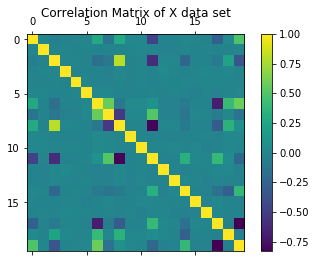

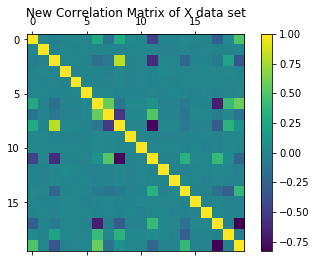

In [12]:
#Matrix of Correlation
plt.title("Correlation Matrix of X data set")
plt.matshow(pd.DataFrame(X_train).corr(), fignum=0) #plot matrix of correlation graph
plt.colorbar() #Check the corrleation

# Create new matric of Corrlation to check whether two matrix of correltion are the same
plt.figure()
cov=np.cov(X_train.T)
stds=np.std(X_train, axis=0)
stds_matrix=np.array([[stds[i]*stds[j] for j in range(20)]for i in range(20)])
new_corr = cov/stds_matrix

plt.title("New Correlation Matrix of X data set")
plt.matshow(new_corr, fignum=0)
plt.colorbar()


In [13]:
#Check X train dataset whether is normal and have imbalance data
def normal_dis(X):
    plt.figure()
    fig, ax = plt.subplots()
    ax.hist(X, bins=35, density=True, rwidth=1,facecolor='c',alpha=0.5)
    x = np.linspace(-10, 10, 4000)
    ax.plot(x, 1 / np.sqrt(2*np.pi) * np.exp(-(x**2)/2), linewidth=1.8)
    plt.show()

<Figure size 432x288 with 0 Axes>

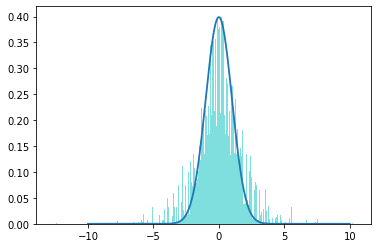

In [14]:
normal_dis(X_train)

In [15]:
def train(X, y):
	return np.linalg.inv(X.T@X)@X.T@y # returns the fitted parameter, by the closed-form formula 

params=train(X_train,y_train)
print(params)

[[  2.0258425 ]
 [  0.03744904]
 [ 11.79828059]
 [  0.02032406]
 [  0.10563996]
 [ -0.04723817]
 [  0.51438305]
 [ -6.85970352]
 [-11.79448522]
 [  0.03354008]
 [ -0.0366975 ]
 [  1.16296802]
 [  0.012003  ]
 [ -0.06647252]
 [ -0.90702362]
 [ -0.0974151 ]
 [ -0.05817789]
 [ -2.51931391]
 [  1.29950714]
 [  0.8713913 ]]


48986.691606930486


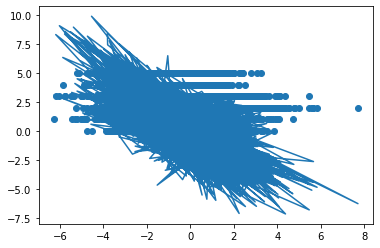

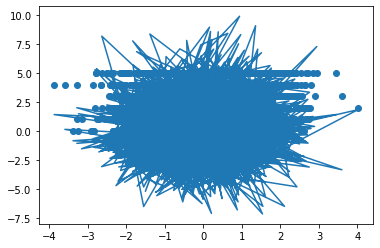

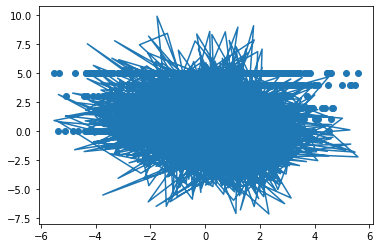

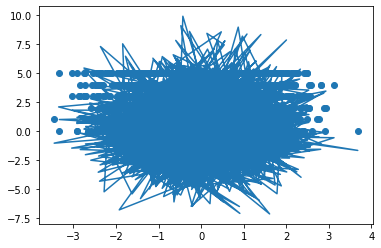

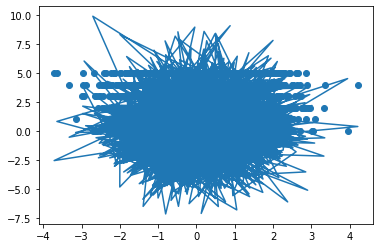

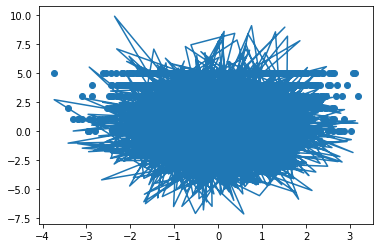

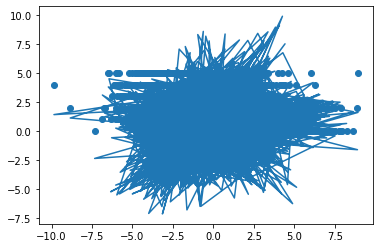

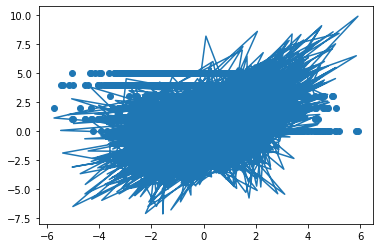

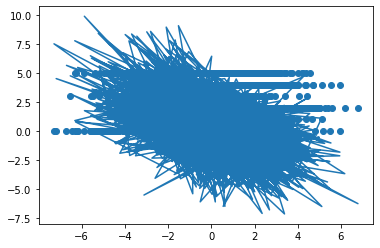

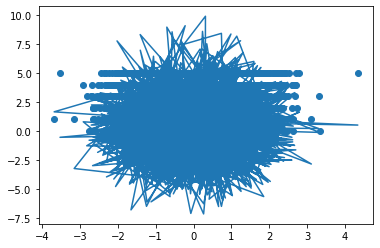

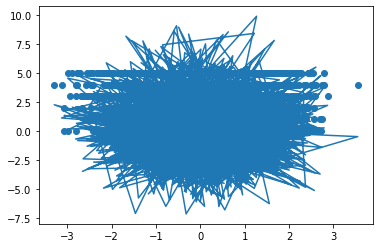

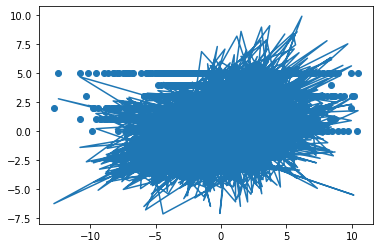

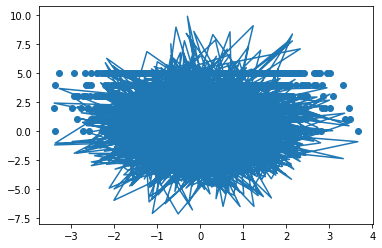

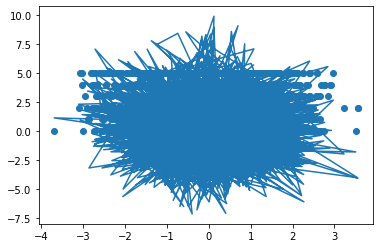

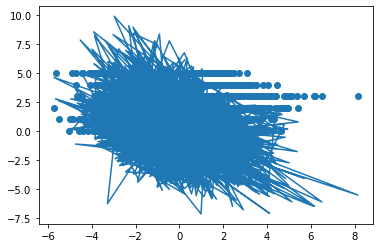

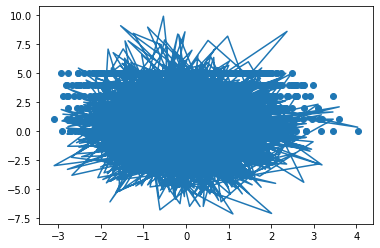

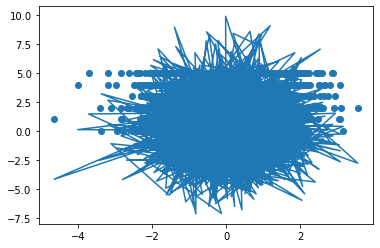

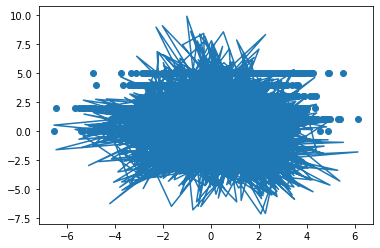

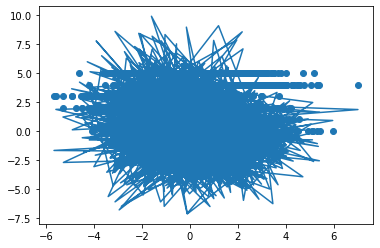

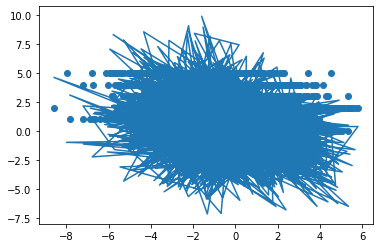

In [16]:
# we first implement a function that makes prediction. I.e., given a dataset (each row of which is an example; with the extra column of all ones) and the fitted parameters, predict the y values of each example
def predict(X_train, params):
    return X_train@params

# find SSE
def SSE(observe, predict):
    return np.sum((observe-predict)**2)
pred=predict(X_train,params)
print(SSE(y_train,pred))

# plot the data and the regression line. Check the relationship between X train and y train (whether is linear)
import matplotlib.pyplot as plt
for n in np.arange(20):
    plt.figure()
    plt.scatter(X_train[:,n],y_train)
    plt.plot(X_train[:,n],pred)


 # Data preprocessing

In [17]:
# TODO: Your code for data preprocessing should be inserted here. Create more cells as you see fit. 
# NOTE: You may use data preprocessing methods that are not covered in this course.
# Suggestions: standardization, normalization, k-means...
# Exercise your creativity in this part! There is no one-size-fits-all approach to do data preprocessing for all kinds of datasets. You'll need to experiment with many possibilities. For example, you may even remove some features if you think doing so would increase your models' prediction accuracy.
from sklearn.model_selection import train_test_split
#ignore warnings
import warnings
warnings.filterwarnings('ignore')
# split the dataset randomly. That is, I randomly select 30% of our entire dataset for testing purposes and the remaining 70% for training.
X_train_training, X_test_testing, y_train_training, y_test =  train_test_split(X_train, y_train, test_size=0.3, random_state = 0)
print(f'X_train_training = {X_train_training.shape}')
print(f'X_test_testing = {X_test_testing.shape}')
print(f'y_train_training = {y_train_training.shape}')
print(f'y_test  = {y_test.shape}')

X_train_training = (2800, 20)
X_test_testing = (1200, 20)
y_train_training = (2800, 1)
y_test  = (1200, 1)


### Data Preporcessing-standardize

<Figure size 432x288 with 0 Axes>

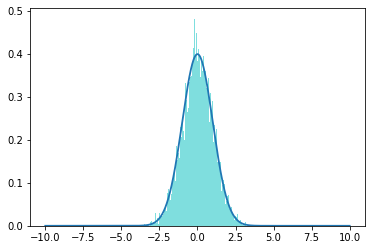

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-1.290730,-0.274143,1.656300,0.928495,0.490264,-0.174208,0.175090,-0.232202,1.422202,0.541206,-0.067216,-0.352096,0.614904,-0.220088,1.105275,-0.207083,-0.622760,-1.259842,0.417362,0.282542
1,-0.710452,-0.287449,-1.387001,-0.392818,0.204908,-1.218017,-0.300270,0.193424,-1.377472,-0.149898,-0.772438,1.688171,0.558285,0.214448,0.671952,-0.668609,0.520666,1.008145,0.066571,-0.329644
2,0.353630,0.018021,1.818005,0.346089,0.263170,-0.435291,-0.036007,0.379679,1.252579,0.391365,0.819436,-0.778660,0.460577,0.612006,-1.033952,0.781480,-0.471003,0.503727,1.059602,-1.184210
3,-0.945621,-0.580892,1.278688,-0.179506,0.302620,0.079346,-0.576814,0.066878,0.703112,0.951609,-0.622863,0.099621,0.455525,-1.534631,0.633493,1.039410,0.768821,0.229505,0.094959,-0.795413
4,-2.517364,-1.291488,-0.069882,-0.896729,1.528733,1.245524,-2.807013,-1.403525,-0.440080,-0.722482,0.654240,0.767933,-0.344120,-0.538377,2.748411,-0.006451,-1.115899,0.620263,-2.789184,-0.527259


In [18]:
#Standardize X_train_training and testing data sets.
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train_training)
X_test_sc = sc.transform(X_test_testing)
pd.DataFrame(X_train_sc).head()
#Check whether normal and have imbalance data
normal_dis(X_train_sc)
pd.DataFrame(X_train_sc).head()

### Data Preprocessing-Normalize

<Figure size 432x288 with 0 Axes>

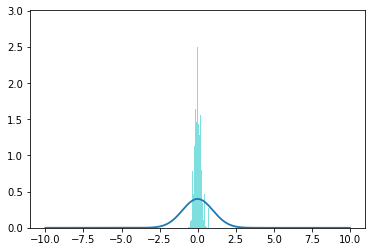

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-0.437537,-0.040256,0.496096,0.155444,0.085836,-0.032992,0.046371,-0.046093,0.486858,0.090014,-0.015452,-0.177601,0.106215,-0.043328,0.295562,-0.038964,-0.102765,-0.335260,0.147002,0.020449
1,-0.222172,-0.035588,-0.256343,-0.054730,0.031618,-0.176729,-0.118393,0.062497,-0.346931,-0.021378,-0.110795,0.745722,0.081120,0.026030,0.142044,-0.098179,0.074251,0.264169,0.040470,-0.165243
2,0.046030,0.007634,0.486890,0.052543,0.042982,-0.070043,-0.033414,0.115147,0.390691,0.058716,0.118737,-0.362254,0.072845,0.089594,-0.295212,0.116196,-0.069922,0.154188,0.296183,-0.452863
3,-0.388198,-0.105897,0.459526,-0.034391,0.062811,0.011854,-0.290240,0.044854,0.296007,0.183796,-0.124523,0.068100,0.092420,-0.310983,0.183477,0.199617,0.150814,0.106535,0.065223,-0.420415
4,-0.412539,-0.107953,0.021181,-0.076916,0.134208,0.107531,-0.581818,-0.194570,-0.057831,-0.062366,0.053512,0.210140,-0.027251,-0.050323,0.397905,-0.002554,-0.095329,0.104960,-0.388515,-0.137603


In [19]:
#Normalize X_train_training and testing data sets.
from sklearn import preprocessing
X_train_normali = preprocessing.normalize(X_train_training)
X_test_normali = preprocessing.normalize(X_test_testing)
#Check whether normal and have imbalance data
normal_dis(X_train_normali)
pd.DataFrame(X_train_normali).head()

### Data Preprocessing K-Mean

In [20]:
from sklearn.cluster import KMeans

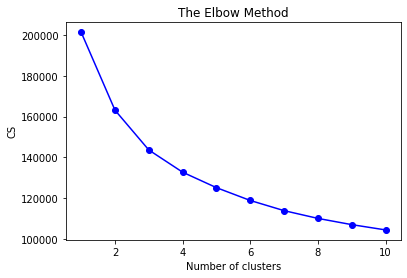

In [21]:
#Find the best n
from sklearn.cluster import KMeans
cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X_train)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 11), cs, marker='o', color='b')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

In [22]:
#Test K-Means accuracy and ineritria
from sklearn.preprocessing import LabelEncoder
kmeans=KMeans(n_clusters=6, random_state=0) 
kmeans.fit(X_train)
X_transform=kmeans.transform(X_train)

print(X_transform.shape)
le = LabelEncoder()
le.fit(y_train)
y = le.transform(y_train)

labels = kmeans.labels_
correct_labels = sum(y == labels)

print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

(4000, 6)
Result: 467 out of 4000 samples were correctly labeled.
Accuracy score: 0.12


In [23]:
kmeans.inertia_

118864.4041823072

###### In below Model building, I will not use K-Means Clustering to build and analyse because it has low accuracy in the data set, high inertia and big dimensions.

# Model building & model evaluation

In [24]:
# TODO: Your code for model building & model evaluation should be inserted here. Create more cells as you see fit. 
#Import Sklearn Model
def Accuracy(search, X):
    print(f'The best parameters found are: {search.best_params_}') # the parameter settings that produce the highest mean cross-validated accuracy
    print(f'The mean cross-validated accuracy is: {search.best_score_}') # shows the mean cross-validated accuracy for the model with the best parameter setting
    print(f'predictions on the few examples under the best parameter setting: {search.predict(X)[:40]}') #use the predict() method of the tree_grid_search object to find the prediction of each example
    print(f'accuracy of the best model on the whole dataset: {accuracy_score(y_train_training, search.predict(X))}')

In [25]:
class Model:
    def __init__(self, name):
        self.name = name #Set Classifier
        
    def Dataset(self,test, train):
        self.pred_test = self.name.predict(test) 
        print(f"Predicted class labels of the data in test set: \n{self.pred_test}")
        self.pred_train = self.name.predict(train)  #make prediction on the test data set
        print(f"Predicted class labels of the data in train set: \n{self.pred_train}")
    
    def Pred_accur(self):
        print(f'accuracy on train set: {accuracy_score(y_train_training, self.pred_train)}')
        print(f'accuracy on test set: {accuracy_score(y_test, self.pred_test)}')
    
    def ConfusionMatrics(self):
        #plot the Confusion of Matric and report to see precision, recall and f score
        confmat = confusion_matrix(y_test, self.pred_test)
        fig, ax = plt.subplots(figsize=(2.5, 2.5))
        ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
        for i in range(confmat.shape[0]):
            for j in range(confmat.shape[1]):
                ax.text(x=j, y=i, s=confmat[i,j], va='center', ha='center')
        plt.xlabel('predicted label')        
        plt.ylabel('true label')
        plt.show()
    
        print(classification_report(y_test, self.pred_test))

# Decision tree

In [26]:
tree_param_grid = [ {'min_samples_split': range(2, 20), 'max_depth': range(2, 20)} ]# create a list that stores the parameter settings we want to explore with.
tree_grid_search = GridSearchCV( DecisionTreeClassifier(), tree_param_grid, cv=5) # this code sets up the parameter setting.

X = X_train_training #Let X
y = y_train_training #Let y

In [27]:
tree_grid_search.fit(X, y) # this code will do the heavy lifting

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid=[{'max_depth': range(2, 20),
                          'min_samples_split': range(2, 20)}])

In [28]:
Accuracy(tree_grid_search, X) #Find the accuracy of grid

The best parameters found are: {'max_depth': 9, 'min_samples_split': 12}
The mean cross-validated accuracy is: 0.5946428571428571
predictions on the few examples under the best parameter setting: [4 5 5 1 2 0 3 5 3 5 5 2 1 0 3 5 5 5 4 2 3 3 3 5 2 3 5 3 4 4 4 4 4 0 5 5 1
 1 1 3]
accuracy of the best model on the whole dataset: 0.7917857142857143


In [29]:
#Check out the official doc for the complete list of parameters of the model. 
#change to "entropy" by changing the 'criterion' parameter. 
tree = DecisionTreeClassifier(criterion='entropy', max_depth = 9, min_samples_split=12, random_state=0)
tree.fit(X_train_training, y_train_training) #build the decision tree by giving the train datasets (both X_train and y_train) as arguments.

DecisionTreeClassifier(criterion='entropy', max_depth=9, min_samples_split=12,
                       random_state=0)

In [30]:
a=Model(tree) #Call the class (Model) and rename as a
a.Dataset(X_test_testing, X_train_training) #Call the method a.Dataset
a.Pred_accur()

Predicted class labels of the data in test set: 
[5 0 3 ... 0 1 4]
Predicted class labels of the data in train set: 
[4 5 5 ... 3 4 1]
accuracy on train set: 0.7925
accuracy on test set: 0.5958333333333333


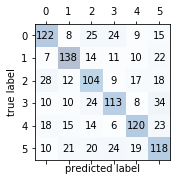

              precision    recall  f1-score   support

           0       0.63      0.60      0.61       203
           1       0.68      0.68      0.68       202
           2       0.52      0.55      0.53       188
           3       0.60      0.57      0.59       199
           4       0.66      0.61      0.63       196
           5       0.51      0.56      0.53       212

    accuracy                           0.60      1200
   macro avg       0.60      0.60      0.60      1200
weighted avg       0.60      0.60      0.60      1200



In [31]:
a.ConfusionMatrics() #Call the method a.ConfusionMatrics

### Decision Tree (Standardize)

In [32]:
tree_param_grid = [ {'min_samples_split': range(2, 20), 'max_depth': range(2, 20)} ]# create a list that stores the parameter settings we want to explore with.
tree_grid_search_sc = GridSearchCV( DecisionTreeClassifier(), tree_param_grid, cv=5) # this code sets up the parameter setting.

X_sc = X_train_sc

In [33]:
tree_grid_search_sc.fit(X_sc, y)# this code will do the heavy lifting

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid=[{'max_depth': range(2, 20),
                          'min_samples_split': range(2, 20)}])

In [34]:
Accuracy(tree_grid_search_sc, X_sc)#Find the accuracy of grid

The best parameters found are: {'max_depth': 8, 'min_samples_split': 9}
The mean cross-validated accuracy is: 0.5960714285714286
predictions on the few examples under the best parameter setting: [4 5 5 1 2 0 3 4 3 5 5 2 1 0 3 5 5 5 4 2 3 3 3 5 2 3 5 3 4 1 4 4 4 0 5 5 1
 1 1 3]
accuracy of the best model on the whole dataset: 0.7575


In [35]:
tree = DecisionTreeClassifier(criterion='entropy', max_depth = 8, min_samples_split=11, random_state=0)
tree.fit(X_train_training, y_train_training)

DecisionTreeClassifier(criterion='entropy', max_depth=8, min_samples_split=11,
                       random_state=0)

In [36]:
a=Model(tree)#Call the class (Model) and rename as a
a.Dataset(X_test_sc, X_train_sc)#Call the method a.Dataset
a.Pred_accur()#Call the method a.Pred_accur

Predicted class labels of the data in test set: 
[5 2 3 ... 0 5 4]
Predicted class labels of the data in train set: 
[4 5 5 ... 2 4 5]
accuracy on train set: 0.4957142857142857
accuracy on test set: 0.4683333333333333


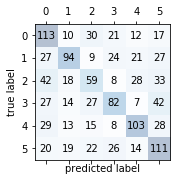

              precision    recall  f1-score   support

           0       0.44      0.56      0.49       203
           1       0.56      0.47      0.51       202
           2       0.36      0.31      0.34       188
           3       0.49      0.41      0.45       199
           4       0.56      0.53      0.54       196
           5       0.43      0.52      0.47       212

    accuracy                           0.47      1200
   macro avg       0.47      0.47      0.47      1200
weighted avg       0.47      0.47      0.47      1200



In [37]:
a.ConfusionMatrics()#Call the method a.ConfusionMatrics

### Decision Tree (Normalize)

In [38]:
tree_param_grid = [ {'min_samples_split': range(2, 20), 'max_depth': range(2, 20)} ]

tree_grid_search_normali = GridSearchCV( DecisionTreeClassifier(), tree_param_grid, cv=5) 

X_normali = X_train_normali

In [39]:
tree_grid_search_normali.fit(X_normali, y)# this code will do the heavy lifting

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid=[{'max_depth': range(2, 20),
                          'min_samples_split': range(2, 20)}])

In [40]:
Accuracy(tree_grid_search_normali, X_normali)#Find the accuracy of grid

The best parameters found are: {'max_depth': 10, 'min_samples_split': 3}
The mean cross-validated accuracy is: 0.5903571428571428
predictions on the few examples under the best parameter setting: [4 5 5 1 2 0 4 5 2 5 5 2 1 0 3 5 5 5 0 3 3 3 3 5 2 3 5 3 4 1 4 0 4 0 5 5 1
 1 5 3]
accuracy of the best model on the whole dataset: 0.8771428571428571


In [41]:
tree = DecisionTreeClassifier(criterion='entropy', max_depth = 8, min_samples_split=7, random_state=0)
tree.fit(X_train_normali, y_train_training)

DecisionTreeClassifier(criterion='entropy', max_depth=8, min_samples_split=7,
                       random_state=0)

In [42]:
a=Model(tree)#Call the class (Model) and rename as a
a.Dataset(X_test_normali, X_train_normali)#Call the method a.Dataset
a.Pred_accur()#Call the method a.Pred_accur

Predicted class labels of the data in test set: 
[5 0 5 ... 0 5 4]
Predicted class labels of the data in train set: 
[4 5 5 ... 3 4 5]
accuracy on train set: 0.7721428571428571
accuracy on test set: 0.5841666666666666


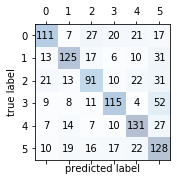

              precision    recall  f1-score   support

           0       0.65      0.55      0.59       203
           1       0.67      0.62      0.64       202
           2       0.54      0.48      0.51       188
           3       0.65      0.58      0.61       199
           4       0.62      0.67      0.65       196
           5       0.45      0.60      0.51       212

    accuracy                           0.58      1200
   macro avg       0.60      0.58      0.59      1200
weighted avg       0.60      0.58      0.59      1200



In [43]:
a.ConfusionMatrics()#Call the method a.ConfusionMatrics

# Naive Bayes

In [44]:
NB = GaussianNB() #instantiate a model NB
NB.fit(X_train_training, y_train_training)

GaussianNB()

In [45]:
a=Model(NB)
a.Dataset(X_test_testing, X_train_training)
a.Pred_accur()

Predicted class labels of the data in test set: 
[4 2 5 ... 0 1 4]
Predicted class labels of the data in train set: 
[4 3 4 ... 4 4 4]
accuracy on train set: 0.5396428571428571
accuracy on test set: 0.5233333333333333


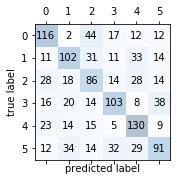

              precision    recall  f1-score   support

           0       0.56      0.57      0.57       203
           1       0.54      0.50      0.52       202
           2       0.42      0.46      0.44       188
           3       0.57      0.52      0.54       199
           4       0.54      0.66      0.60       196
           5       0.51      0.43      0.47       212

    accuracy                           0.52      1200
   macro avg       0.52      0.52      0.52      1200
weighted avg       0.52      0.52      0.52      1200



In [46]:
a.ConfusionMatrics()

In [47]:
np.mean(cross_val_score(NB, X_train_training, y_train_training, cv=10)) #find the mean accuracy for NB

0.5285714285714286

### Navie Bayes (Standarize)

In [48]:
a=Model(NB)
a.Dataset(X_test_sc, X_train_sc)
a.Pred_accur()

Predicted class labels of the data in test set: 
[4 4 5 ... 0 1 4]
Predicted class labels of the data in train set: 
[4 3 4 ... 4 4 4]
accuracy on train set: 0.4857142857142857
accuracy on test set: 0.46416666666666667


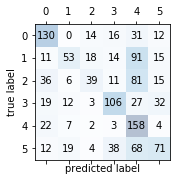

              precision    recall  f1-score   support

           0       0.57      0.64      0.60       203
           1       0.55      0.26      0.35       202
           2       0.49      0.21      0.29       188
           3       0.56      0.53      0.55       199
           4       0.35      0.81      0.48       196
           5       0.48      0.33      0.39       212

    accuracy                           0.46      1200
   macro avg       0.50      0.46      0.45      1200
weighted avg       0.50      0.46      0.45      1200



In [49]:
a.ConfusionMatrics()

In [50]:
np.mean(cross_val_score(NB, X_train_sc, y_train_training, cv=10))

0.5285714285714286

### Navie Bayes (Normalize)

In [51]:
a=Model(NB)
a.Dataset(X_test_normali, X_train_normali)
a.Pred_accur()

Predicted class labels of the data in test set: 
[4 4 5 ... 0 4 4]
Predicted class labels of the data in train set: 
[4 5 4 ... 4 4 4]
accuracy on train set: 0.2425
accuracy on test set: 0.24166666666666667


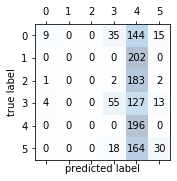

              precision    recall  f1-score   support

           0       0.64      0.04      0.08       203
           1       0.00      0.00      0.00       202
           2       0.00      0.00      0.00       188
           3       0.50      0.28      0.36       199
           4       0.19      1.00      0.32       196
           5       0.50      0.14      0.22       212

    accuracy                           0.24      1200
   macro avg       0.31      0.24      0.16      1200
weighted avg       0.31      0.24      0.16      1200



In [52]:
a.ConfusionMatrics()

In [53]:
np.mean(cross_val_score(NB, X_train_normali, y_train_training, cv=10))

0.5385714285714285

# kNN

In [54]:
kNN_param_grid = [  {'n_neighbors': range(1, 70)} ] # find the best k
kNN_grid_search = GridSearchCV(KNeighborsClassifier(), kNN_param_grid, cv=20)

In [55]:
kNN_grid_search.fit(X_train_training, y_train_training)

GridSearchCV(cv=20, estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': range(1, 70)}])

In [56]:
print(f'The best parameters found are: {kNN_grid_search.best_params_}')
print(f'The mean cross-validated accuracy is: {kNN_grid_search.best_score_}')

kNN_grid_search.predict(X)[:50]
print(f'accuracy of the best model on the whole dataset: {accuracy_score(y_train_training, kNN_grid_search.predict(X))}')

The best parameters found are: {'n_neighbors': 18}
The mean cross-validated accuracy is: 0.6882142857142857
accuracy of the best model on the whole dataset: 0.7446428571428572


In [57]:
kNN = KNeighborsClassifier(n_neighbors=21, weights='uniform', metric='euclidean') #instantiate model (i.e., choose model parameters)
kNN.fit(X_train_training, y_train_training)# fit model to data

KNeighborsClassifier(metric='euclidean', n_neighbors=21)

In [58]:
a=Model(kNN)
a.Dataset(X_test_testing, X_train_training)
a.Pred_accur()

Predicted class labels of the data in test set: 
[2 0 5 ... 0 1 4]
Predicted class labels of the data in train set: 
[4 5 4 ... 3 4 2]
accuracy on train set: 0.7328571428571429
accuracy on test set: 0.7033333333333334


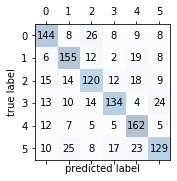

              precision    recall  f1-score   support

           0       0.72      0.71      0.71       203
           1       0.71      0.77      0.74       202
           2       0.65      0.64      0.64       188
           3       0.75      0.67      0.71       199
           4       0.69      0.83      0.75       196
           5       0.70      0.61      0.65       212

    accuracy                           0.70      1200
   macro avg       0.70      0.70      0.70      1200
weighted avg       0.70      0.70      0.70      1200



In [59]:
a.ConfusionMatrics()

### KNN (Standarize)

In [60]:
kNN_param_grid = [  {'n_neighbors': range(1, 50)} ] # find the best k

kNN_grid_search_sc = GridSearchCV(KNeighborsClassifier(), kNN_param_grid, cv=20)

In [61]:
kNN_grid_search_sc.fit(X_train_sc, y_train_training)

GridSearchCV(cv=20, estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': range(1, 50)}])

In [62]:
print(f'The best parameters found are: {kNN_grid_search_sc.best_params_}')
print(f'The mean cross-validated accuracy is: {kNN_grid_search_sc.best_score_}')

print(f'predictions on the few examples under the best parameter setting: {kNN_grid_search_sc.predict(X_sc)[:40]}') 
print(f'accuracy of the best model on the whole dataset: {accuracy_score(y, kNN_grid_search_sc.predict(X_sc))}')

The best parameters found are: {'n_neighbors': 42}
The mean cross-validated accuracy is: 0.6217857142857143
predictions on the few examples under the best parameter setting: [4 5 4 1 2 0 3 5 0 4 5 3 1 5 3 3 5 5 1 3 3 3 3 5 1 3 5 3 4 1 4 5 4 0 5 5 1
 1 5 3]
accuracy of the best model on the whole dataset: 0.6617857142857143


In [63]:
kNN_sc = KNeighborsClassifier(n_neighbors=42) 
kNN_sc.fit(X_train_sc, y_train_training) 

KNeighborsClassifier(n_neighbors=42)

In [64]:
a=Model(kNN_sc)
a.Dataset(X_test_sc, X_train_sc)
a.Pred_accur()

Predicted class labels of the data in test set: 
[5 2 5 ... 0 1 2]
Predicted class labels of the data in train set: 
[4 5 4 ... 3 4 2]
accuracy on train set: 0.6617857142857143
accuracy on test set: 0.5991666666666666


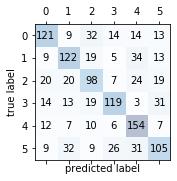

              precision    recall  f1-score   support

           0       0.65      0.60      0.62       203
           1       0.60      0.60      0.60       202
           2       0.52      0.52      0.52       188
           3       0.67      0.60      0.63       199
           4       0.59      0.79      0.68       196
           5       0.56      0.50      0.52       212

    accuracy                           0.60      1200
   macro avg       0.60      0.60      0.60      1200
weighted avg       0.60      0.60      0.60      1200



In [65]:
a.ConfusionMatrics()

### KNN (Normalize)

In [66]:
kNN_param_grid = [  {'n_neighbors': range(1, 50)} ] # find the best k

kNN_grid_search_normali = GridSearchCV(KNeighborsClassifier(), kNN_param_grid, cv=20)

In [67]:
kNN_grid_search_normali.fit(X_train_normali, y_train_training)

GridSearchCV(cv=20, estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': range(1, 50)}])

In [68]:
print(f'The best parameters found are: {kNN_grid_search_normali.best_params_}')
print(f'The mean cross-validated accuracy is: {kNN_grid_search_normali.best_score_}')

print(f'predictions on the few examples under the best parameter setting: {kNN_grid_search_normali.predict(X_normali)[:40]}') 
print(f'accuracy of the best model on the whole dataset: {accuracy_score(y, kNN_grid_search_normali.predict(X_normali))}')

The best parameters found are: {'n_neighbors': 13}
The mean cross-validated accuracy is: 0.6885714285714284
predictions on the few examples under the best parameter setting: [4 5 5 1 2 0 3 5 0 5 5 2 1 5 3 4 5 5 2 3 3 3 3 0 2 3 5 3 4 1 4 1 4 0 5 5 1
 1 5 3]
accuracy of the best model on the whole dataset: 0.7421428571428571


In [69]:
kNN_normali = KNeighborsClassifier(n_neighbors=13) 
kNN_normali.fit(X_train_normali, y_train_training) 

KNeighborsClassifier(n_neighbors=13)

In [70]:
a=Model(kNN_normali)
a.Dataset(X_test_normali, X_train_normali)
a.Pred_accur()

Predicted class labels of the data in test set: 
[5 2 5 ... 0 1 4]
Predicted class labels of the data in train set: 
[4 5 5 ... 3 4 5]
accuracy on train set: 0.7421428571428571
accuracy on test set: 0.665


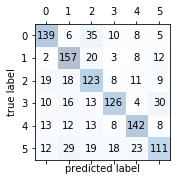

              precision    recall  f1-score   support

           0       0.71      0.68      0.70       203
           1       0.66      0.78      0.71       202
           2       0.55      0.65      0.60       188
           3       0.73      0.63      0.68       199
           4       0.72      0.72      0.72       196
           5       0.63      0.52      0.57       212

    accuracy                           0.67      1200
   macro avg       0.67      0.67      0.66      1200
weighted avg       0.67      0.67      0.66      1200



In [71]:
a.ConfusionMatrics()

# Logistic-Regression

In [72]:
log_reg = LogisticRegression(max_iter=300, random_state=1) # model instantiation. Keep in mind that if the class labels are not binary, this function will adopt the one-vs-all strategy.

from sklearn.model_selection import cross_val_score 

cross_val_res=cross_val_score(log_reg, X, y, cv=10) # do cross validation

print(np.mean(cross_val_res)) # find the cross-validated accuracy

0.5417857142857143


In [73]:
log_reg = LogisticRegression(max_iter=300, random_state=1) # model instantiation. Keep in mind that if the class labels are not binary, this function will adopt the one-vs-all strategy.

from sklearn.model_selection import cross_val_score 

cross_val_res_sc=cross_val_score(log_reg, X_sc, y, cv=10) # do cross validation

print(np.mean(cross_val_res_sc)) # find the cross-validated accuracy

0.5417857142857143


In [74]:
log_reg = LogisticRegression(max_iter=300, random_state=1) # model instantiation. Keep in mind that if the class labels are not binary, this function will adopt the one-vs-all strategy.

from sklearn.model_selection import cross_val_score 

cross_val_res_normali=cross_val_score(log_reg, X_normali, y, cv=10) # do cross validation

print(np.mean(cross_val_res_normali)) # find the cross-validated accuracy

0.5485714285714286


 # Figure generation

In [75]:
# TODO: Your code for generating figures for the should be inserted here. Create more cells as you see fit. 
# Suggestion: compare the accuracies of the models you have built. 
class Compare: #Create a class Model to store it's Contrustor, maxium_Acc, Finalcompare, Finalcompare_sc, Finalcompare_normali
    def __init__(self, tree, NB, kNN):
        self.tree = tree #Create name to store tree classifier
        self.NB = NB #Create name to store NB classifier
        self.kNN = kNN #Create name to store kNN classifier
        
        self.pred_test1 = self.tree.predict(X_test_testing) # call the predict test value of tree
        self.pred_test2 = self.NB.predict(X_test_testing) # call the predict test value of NB
        self.pred_test3 = self.kNN.predict(X_test_testing) # call the predict test value of kNN
        
        self.pred_train1 = self.tree.predict(X_train_training) # call the predict train value of tree
        self.pred_train2 = self.NB.predict(X_train_training) # call the predict train value of NB
        self.pred_train3 = self.kNN.predict(X_train_training) # call the predict train value of kNN
        
        self.pred_test4 = self.tree.predict(X_test_sc)# call the predict test value of tree (Standarize)
        self.pred_test5 = self.NB.predict(X_test_sc) # call the predict test value of NB (Standarize)
        self.pred_test6 = self.kNN.predict(X_test_sc) # call the predict test value of kNN (Standarize)
        
        self.pred_train4 = self.tree.predict(X_train_sc) # call the predict train value of tree (Standarize)
        self.pred_train5 = self.NB.predict(X_train_sc)  # call the predict train value of NB (Standarize)
        self.pred_train6 = self.kNN.predict(X_train_sc) # call the predict train value of kNN (Standarize)
        
        self.pred_test7 = self.tree.predict(X_test_normali) # call the predict test value of tree (Normalization)
        self.pred_test8 = self.NB.predict(X_test_normali) # call the predict test value of NB (Normalization)
        self.pred_test9 = self.kNN.predict(X_test_normali) # call the predict test value of kNN (Normalization)
        
        self.pred_train7 = self.tree.predict(X_train_normali) # call the predict train value of tree (Normalization)
        self.pred_train8 = self.NB.predict(X_train_normali) # call the predict train value of NB (Normalization)
        self.pred_train9 = self.kNN.predict(X_train_normali)# call the predict train value of kNN (Normalization)
    
    def maximum_Acc(group):
        print('The Largest accuracies is: ', max(group.keys()), max(group.values()))# Find the maximum accuracy in different model
        
    def Finalcompare(self):
        print('Compare the accuracies of Train of 3 models (Descision Tree, Navie Bayes, kNN)')
        Group = {'Descision Tree': accuracy_score(y_train_training, self.pred_train1), 'Navie Bayes': accuracy_score(y_train_training, self.pred_train2),
                    'kNN': accuracy_score(y_train_training, self.pred_train3)}# Use Libiary to store classifier and accurate value
        for x, group in Group.items(): #Print them
            print(f"{x}: {group}")

        print('')

        print('Compare the accuracies of Test of 3 models (Descision Tree, Navie Bayes, kNN)')
        Group_test = {'Descision Tree': accuracy_score(y_test, self.pred_test1), 'Navie Bayes': accuracy_score(y_test, self.pred_test2),
                    'kNN': accuracy_score(y_test, self.pred_test3)}# Use Libiary to store classifier and accurate value
        for x, group in Group_test.items():#Print them
            print(f"{x}: {group}")
            
        Compare.maximum_Acc(Group_test)
    def Finalcompare_sc(self):
        print('Compare the accuracies of Train of 3 models (Descision Tree, Navie Bayes, kNN)')
        Group_sc = {'Descision Tree': accuracy_score(y_train_training, self.pred_train4), 'Navie Bayes': accuracy_score(y_train_training, self.pred_train5),
                    'kNN': accuracy_score(y_train_training, self.pred_train6)}# Use Libiary to store classifier and accurate value
        for x_sc, group_sc in Group_sc.items():#Print them
            print(f"{x_sc}: {group_sc}")

        print('')

        print('Compare the accuracies of Test of 3 models (Descision Tree, Navie Bayes, kNN)')
        Group_test_sc = {'Descision Tree': accuracy_score(y_test, self.pred_test4), 'Navie Bayes': accuracy_score(y_test, self.pred_test5),
                    'kNN': accuracy_score(y_test, self.pred_test6)}# Use Libiary to store classifier and accurate value
        for x_sc, group_sc in Group_test_sc.items():#Print them
            print(f"{x_sc}: {group_sc}")
        
        Compare.maximum_Acc(Group_test_sc)
    def Finalcompare_normali(self):
        print('Compare the accuracies of Train of 3 models (Descision Tree, Navie Bayes, kNN)')
        Group_normali = {'Descision Tree': accuracy_score(y_train_training, self.pred_train7), 'Navie Bayes': accuracy_score(y_train_training, self.pred_train8),
                    'kNN': accuracy_score(y_train_training, self.pred_train9)}# Use Libiary to store classifier and accurate value
        for x_normali, group_normali in Group_normali.items():#Print them
            print(f"{x_normali}: {group_normali}")

        print('')

        print('Compare the accuracies of Test of 3 models (Descision Tree, Navie Bayes, kNN)')
        Group_test_normali = {'Descision Tree': accuracy_score(y_test, self.pred_test7), 'Navie Bayes': accuracy_score(y_test, self.pred_test8),
                    'kNN': accuracy_score(y_test, self.pred_test9)}# Use Libiary to store classifier and accurate value
        for x_normali, group_normali in Group_test_normali.items():#Print them
            print(f"{x_normali}: {group_normali}")
        Compare.maximum_Acc(Group_test_normali)

In [76]:
b=Compare(tree, NB, kNN) #Call the class Compare
b.Finalcompare() #Call the method FinalCompare

Compare the accuracies of Train of 3 models (Descision Tree, Navie Bayes, kNN)
Descision Tree: 0.3867857142857143
Navie Bayes: 0.5396428571428571
kNN: 0.7328571428571429

Compare the accuracies of Test of 3 models (Descision Tree, Navie Bayes, kNN)
Descision Tree: 0.3441666666666667
Navie Bayes: 0.5233333333333333
kNN: 0.7033333333333334
The Largest accuracies is:  kNN 0.7033333333333334


In [77]:
b=Compare(tree, NB, kNN_sc)#Call the class Compare
b.Finalcompare_sc()#Call the method FinalCompare_sc

Compare the accuracies of Train of 3 models (Descision Tree, Navie Bayes, kNN)
Descision Tree: 0.42857142857142855
Navie Bayes: 0.4857142857142857
kNN: 0.6617857142857143

Compare the accuracies of Test of 3 models (Descision Tree, Navie Bayes, kNN)
Descision Tree: 0.37916666666666665
Navie Bayes: 0.46416666666666667
kNN: 0.5991666666666666
The Largest accuracies is:  kNN 0.5991666666666666


In [78]:
b=Compare(tree, NB, kNN_normali)#Call the class Compare
b.Finalcompare_normali()#Call the method FinalCompare_normali

Compare the accuracies of Train of 3 models (Descision Tree, Navie Bayes, kNN)
Descision Tree: 0.7721428571428571
Navie Bayes: 0.2425
kNN: 0.7421428571428571

Compare the accuracies of Test of 3 models (Descision Tree, Navie Bayes, kNN)
Descision Tree: 0.5841666666666666
Navie Bayes: 0.24166666666666667
kNN: 0.665
The Largest accuracies is:  kNN 0.665


In [79]:
print(np.mean(cross_val_score(tree, X, y, cv=5)))
print(np.mean(cross_val_score(NB, X, y, cv=5)))
print(np.mean(cross_val_score(kNN, X, y, cv=5)))
print(np.mean(cross_val_res))

0.5625000000000001
0.5257142857142856
0.6728571428571428
0.5417857142857143


#### Generate y_test (kNN) and Final Decision

In [80]:
Model(kNN)
a.Dataset(X_test_testing, X_train_training)
a.Pred_accur()

Predicted class labels of the data in test set: 
[5 2 5 ... 0 1 4]
Predicted class labels of the data in train set: 
[4 5 5 ... 3 4 5]
accuracy on train set: 0.7421428571428571
accuracy on test set: 0.665


In [81]:
Model(kNN)
a.Dataset(X_test, X_train)

Predicted class labels of the data in test set: 
[0 4 4 ... 4 4 2]
Predicted class labels of the data in train set: 
[5 2 4 ... 1 2 0]


In [82]:
final=kNN_grid_search.predict(X_train)

In [83]:
pd.DataFrame(final.shape)

,0
0,4000


In [84]:
pd.DataFrame(final)[:10]

,0
0,5
1,2
2,4
3,4
4,2
5,2
6,2
7,5
8,2
9,0


I will choose kNN model and no processing dataset(X_train_traing, y_train_training) to be my final decision. Because it has high accuracy (around 70%), it has not imbalance data and it's test set is very close to train set.

Also, kNN model compare to other models such as decision tree and Naive Bayes, it has high accuary.

Meanwhile, no processing dataset is more accuarate than standarize and normalize datasets.

Therefore, kNN model and no processing dataset is the best result in this prediction.

 # Exporting final prediction result

In [85]:
def export_result_to_csv(predict, stu_name):
	"""[This functions export your prediction on X_test.csv]

	Args:
		predict (1d array): the ith entry gives the prediction of the ith test example. This format is identical to that of the predict() method of the models in sklearn. That is, you can given the output of the  predict() method as the parameter for the function.
		stu_name (string): your full English name
	"""
	pd.DataFrame(predict).to_csv(f"{stu_name}.csv", header=False, index=False) # name the output as your full English name

# you should call the above function to export your prediction result as a .csv file. Then, upload the file to Moodle. 
# NOTE: you should use this function only on your best model. 

# TODO: your code to call the export_result_to_csv function here....



In [86]:
export_result_to_csv(final, "y_test")